In [60]:
# For image processing
import matplotlib.pyplot as plt
import numpy as np
from skimage import color,io,data
from skimage.transform import resize
# ---- Face Detection ----
import dlib
from PIL import Image
# ------
import os
from glob import glob
import os.path as path
from tqdm import tqdm
# path.join('','','') # could be list
# path.expanduser('root')

In [62]:
if not path.isdir('/Users/joecao/vae/data/'):  
    os.makedirs('')
f_path='/Users/joecao/vae/data/'    # path of input data
out_path1='/Users/joecao/vae/data/output/png/'   # path of output png
out_path2='/Users/joecao/vae/data/output/npy/'   # path of output npy
png_files=glob(path.join(f_path,'*.jpg'))   # list

In [63]:
# Reference https://stackoverflow.com/questions/13211745/detect-face-then-autocrop-pictures
def detect_faces(image):
    """
    input: image import from io.imread()
    output: list[list] a nested list with corner positions of each face
    """
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()
    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]
    return face_frames
# -------- demo -------
# Load image
# img_path = '/Users/joecao/vae/data/V6562.jpg'
# image = io.imread(img_path)
# # Detect faces
# detected_faces = detect_faces(image)
# Crop faces and plot

  0%|          | 0/1 [00:00<?, ?it/s]

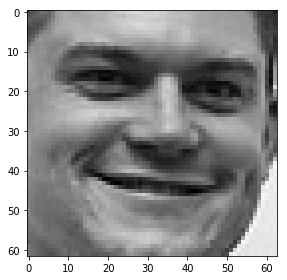

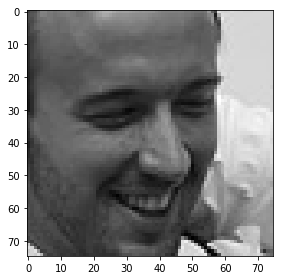

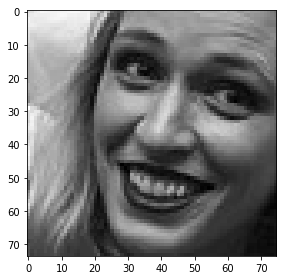

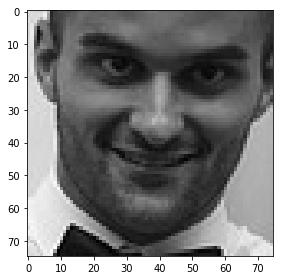

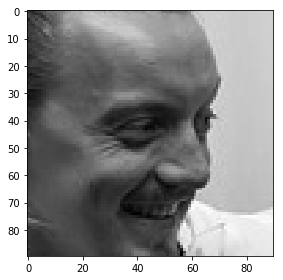

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


In [65]:
for k in tqdm(range(len(png_files))):
    img_path=png_files[k]
    img_raw=io.imread(img_path)
    detected_faces=detect_faces(img_raw)
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(img_raw).crop(face_rect)  # face: <class 'PIL.Image.Image'>
        face_ndarr = np.array(face)
        img = color.rgb2gray(face_ndarr)
        img_minmax=(img-np.min(img))/(np.max(img)-np.min(img))
        img_resized = resize(img_minmax, (512,512),anti_aliasing=False)
        img_resized=img_minmax
        img_rescaled = ((img_resized)*255).astype(np.uint8)
        np.save(out_path2+'img_np'+np.str(k)+'_'+np.str(n), img_rescaled)
        io.imsave(out_path1+'img'+np.str(k)+'_'+np.str(n)+'.png',img_rescaled)
# comment the following two lines
        io.imshow(img_rescaled,cmap='gray', vmin=0, vmax=255)
        plt.show()